In [1]:
#https://blog.csdn.net/m0_61399808/article/details/129718219
#数据加载
import pandas as pd
X = pd.DataFrame(pd.read_excel('a2_x.xlsx')).values  # 输入特征
y = pd.DataFrame(pd.read_excel('a2_y.xlsx')).values  # 目标变量

In [2]:
#将目标变量的定类数据分类编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
label_mapping = {0: 'AD', 1: 'CN'}
#此处为了后续输出混淆矩阵时，用原始数据输出

/Users/sunqian/anaconda3/envs/ICR/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
from sklearn.model_selection import train_test_split
# 将数据分为训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

In [6]:
import xgboost as xgb
# 训练XGBoost分类器
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
#xgb.plot_tree(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [7]:
# 使用测试数据预测类别
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
# 输出混淆矩阵
for i, true_label in enumerate(label_mapping.values()):
    row = ''
    for j, pred_label in enumerate(label_mapping.values()):
        row += f'{cm[i, j]} ({pred_label})\t'
    print(f'{row} | {true_label}')
 
# 输出混淆矩阵
print(classification_report(y_test, y_pred,target_names=['AD', 'CN']))  # 输出混淆矩阵

20 (AD)	3 (CN)	 | AD
5 (AD)	2 (CN)	 | CN
              precision    recall  f1-score   support

          AD       0.80      0.87      0.83        23
          CN       0.40      0.29      0.33         7

    accuracy                           0.73        30
   macro avg       0.60      0.58      0.58        30
weighted avg       0.71      0.73      0.72        30



In [9]:
#此处的导库在上一个代码段中已引入
print("Accuracy:")
print(accuracy_score(y_test, y_pred))

Accuracy:
0.7333333333333333


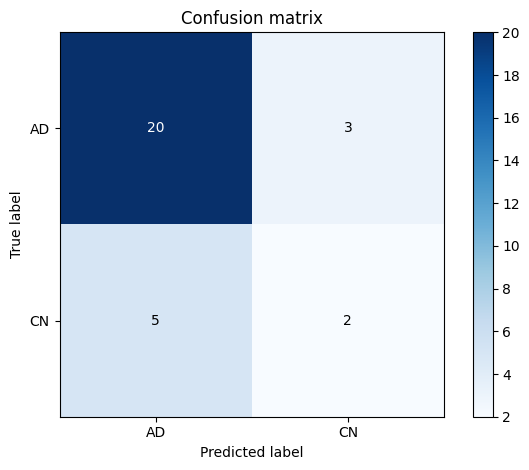

In [10]:
import matplotlib.pyplot as plt
import numpy as np
label_names = ['AD', 'CN']
cm = confusion_matrix(y_test, y_pred)
 
# 绘制混淆矩阵图
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=label_names, yticklabels=label_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')
 
# 在矩阵图中显示数字标签
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
 
fig.tight_layout()
#plt.show()
plt.savefig('XGBoost_Conclusion.png', dpi=300)